In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

import sklearn.preprocessing

from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from keras.utils import np_utils
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

Using TensorFlow backend.


In [2]:
#Data Importing and cleaning
from sklearn.utils import shuffle

scaler_X=StandardScaler()

#df1 = pd.read_csv('BristolRealTrain.csv',header=0)
df1 = pd.read_csv('BristolRealTrain.csv',header=0)

cor1 = df1.loc[:,['Residual Soil','801 - Mudstone','siltsand',
                '804 - Limestone','807 - Breccia','808 - Conglomerate','816 - Gypsum/Rocksalt','I/II','III','IV/IVa/IVb',
                'MF','FI 5th Percentile','FI 50th Percentile','FI 95th Percentile','FI Average','Distance from Aquifer (m)'
                ,'Distance from crossing (m)'
                ]] 

fitted_scaler_X = scaler_X.fit(cor1)
x_fit = fitted_scaler_X.transform(cor1)
X1 = pd.DataFrame(x_fit)

##
y1 = df1.loc[:,['Ring Cycle Duration (mins)']]

#scaler_y=StandardScaler()

#scaler_y1 = scaler_y.fit_transform(y1)
#y1 = pd.DataFrame(scaler_y1)


df8 = pd.read_csv('BristolRealTest.csv',header=0)
print(type(df8))

x_val = df8.loc[:,['Residual Soil','801 - Mudstone','siltsand',
                '804 - Limestone','807 - Breccia','808 - Conglomerate','816 - Gypsum/Rocksalt','I/II','III','IV/IVa/IVb',
                'MF','FI 5th Percentile','FI 50th Percentile','FI 95th Percentile','FI Average','Distance from Aquifer (m)'
                ,'Distance from crossing (m)']] #'Residual Soil',
print(type(x_val))

scaler_X2 = fitted_scaler_X.transform(x_val) #turn to trans not fit_trans
x_val = pd.DataFrame(scaler_X2)

#y_val = df8.loc[:,['No. of Rings that shift','TBM Measured EPB (bar)','Ring Cycle Duration (mins)']]
y_val = df8.loc[:,['Ring Cycle Duration (mins)']]




<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:

inputs = len(X1.columns)
outputs = 1

print(inputs,outputs,len(X1))
print(df1.isnull().sum())

from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience = 500)

from tensorflow.keras.optimizers.schedules import PolynomialDecay
from tensorflow.keras.optimizers import Adam

batch = 16
num_epochs = 100
num_training_steps = (len(X1*0.3)// batch)*num_epochs

lr_schedule = PolynomialDecay(
    initial_learning_rate=1e-3,
    decay_steps=num_training_steps,
    end_learning_rate=0.00001)
opt = Adam(learning_rate=lr_schedule)
#for i in batch:
model = Sequential()

model.add(Dense(64,input_dim=inputs,activation='relu',kernel_initializer='normal'))
#model.add(Dropout(0.2))
model.add(Dense(128,activation='relu',kernel_initializer='normal'))#kernel_initializer=keras.initializers.lecun_uniform(seed=None)))
#model.add(Dropout(0.2))
model.add(Dense(256,activation='relu',kernel_initializer='normal'))
#model.add(Dropout(0.2))
#model.add(Dense(512,activation='relu',kernel_initializer='normal'))
#model.add(Dropout(0.2))
#model.add(Dense(256,activation='relu',kernel_initializer='normal'))
#model.add(Dropout(0.2))
model.add(Dense(128,activation='relu',kernel_initializer='normal'))#kernel_initializer=keras.initializers.lecun_uniform(seed=None)))
#model.add(Dropout(0.2))
model.add(Dense(64,activation='relu',kernel_initializer='normal'))
#model.add(Dropout(0.2))
model.add(Dense(1,kernel_initializer='normal'))#,activation='linear'

model.compile(loss='mse',optimizer='adam',metrics=['mse','mae'])

history = model.fit(X1,y1,batch_size=batch,epochs=num_epochs,verbose=2,validation_split=0.2)#,callbacks=[es])
#history = model.fit(x_train2,y_train2,batch_size=batch,epochs=num_epochs,verbose=2,validation_data=(x_test2,y_test2))#,callbacks=[es])

#Viewing a model
print(history.history.keys())

loss_history = history.history["loss"]
val_history = history.history["val_loss"]
#numpy_loss_history = np.array([loss_history,val_history])
#np.savetxt("NNloss_historytime{}{}.txt".format(neuron,batch), numpy_loss_history, delimiter=",")




In [ ]:
#plot accuracy and loss of model
plt.figure(figsize=(6, 4))
plt.plot(history.history['mse'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_mse'], 'b', label='Accuracy of validation data')
#plt.plot(history.history['loss'], 'r--', label='Loss of training data')
#plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()


In [ ]:

predictions = []
n = 0
i = 0
j = 1
x = 0

while i < len(x_val):
    y_pred = model.predict(x_val[i:j])
    print("y_pred ",y_pred)
    #y_pred_rs = scaler_y.inverse_transform(y_pred)
    #print("y_pred_rs ",y_pred_rs)
    shift = y_pred[0,0]
    predictions.append([(i+2750),shift])
    i += 1
    j += 1

predictions = pd.DataFrame(predictions)
predictions.to_csv('RingCycleTimeSiltandNoDropoutNo512batch16.csv')


In [3]:
y = df1.loc[:,['Ring Cycle Duration (mins)']] #'TBM Measured EPB (bar)'
X = df1.loc[:,['Residual Soil','801 - Mudstone','siltsand',
                '804 - Limestone','807 - Breccia','808 - Conglomerate','816 - Gypsum/Rocksalt','I/II','III','IV/IVa/IVb',
                'MF','FI 5th Percentile','FI 50th Percentile','FI 95th Percentile','FI Average','Distance from Aquifer (m)'
                ,'Distance from crossing (m)']]

In [4]:
scaler_x = MinMaxScaler()
X = scaler_x.fit_transform(X)

scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y)

In [5]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(X,y,test_size = 0.2,random_state=42)
inputs = X.shape[1]
outputs = y.shape[1]



from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience = 500)

from tensorflow.keras.optimizers.schedules import PolynomialDecay

In [7]:
print(X.shape[1],x_val.shape[1])

17 17


In [26]:
def OPT1(numb,model,i,num_epochs):
    num_training_steps = (len(x_train1)// i)*num_epochs
    lr_scheduler = PolynomialDecay(initial_learning_rate = 1e-3,
                                end_learning_rate=0.00001,
                                decay_steps=num_training_steps)
    opt = tensorflow.keras.optimizers.Adam(learning_rate=lr_scheduler)
    model.compile(loss='mae',optimizer=opt)
    history = model.fit(x_train1,y_train1,batch_size=i,epochs=num_epochs,verbose=0,validation_data=(x_test1,y_test1))
    plt.plot(history.history['loss'],color='r',label='Loss')
    plt.plot(history.history['val_loss'],color='b',label='Val_Loss')
    del_loss = np.array(history.history['val_loss']) - np.array(history.history['loss'])
    #plt.plot(del_loss,color='green',label='Residue')
    plt.legend()
    plt.xlabel('EPOCHS')
    print('\nLoss',np.array(history.history['loss'])[-1])
    print('\nVAL Loss',np.array(history.history['val_loss'])[-1])
    plt.show()

    predictions = []
    n = 0
    p = 0
    j = 1
    x = 0

    while p < len(x_val):
        y_pred = model.predict(x_val[p:j])
        #print("y_pred ",y_pred)
        y_pred_rs = scaler_y.inverse_transform(y_pred)
        #print("y_pred_rs ",y_pred_rs)
        shift = y_pred_rs[0,0]
        predictions.append([(p+2750),shift])
        p += 1
        j += 1

    predictions = pd.DataFrame(predictions)
    predictions.to_csv('RingCycleTime{}{}{}OPT1.csv'.format(str(numb),str(i),str(num_epochs)))


def OPT2(numb,model,i,num_epochs):
   
    from tensorflow.keras.optimizers import RMSprop
    from tensorflow.keras.callbacks import ReduceLROnPlateau
    i = 32 #batch
    num_training_steps = (len(x_train1)// i)*num_epochs
    learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                              patience=3, 
                                              verbose=1, 
                                              factor=0.5, 
                                              min_lr=0.00001)
    opt = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
    model.compile(loss='mae',optimizer=opt)
    history = model.fit(x_train1,y_train1,batch_size=i,epochs=num_epochs,verbose=0,validation_data=(x_test1,y_test1),callbacks=[learning_rate_reduction])

    plt.plot(history.history['loss'],color='r',label='Loss')
    plt.plot(history.history['val_loss'],color='b',label='Val_Loss')
    del_loss = np.array(history.history['val_loss'])-np.array(history.history['loss'])
    #plt.plot(del_loss,label='Residue')
    plt.legend()
    plt.xlabel('EPOCHS')
    print('\nLoss',np.array(history.history['loss'])[-1])
    print('\nVAL Loss',np.array(history.history['val_loss'])[-1])
    plt.show()
    
    predictions = []
    n = 0
    p = 0
    j = 1
    x = 0

    while p < len(x_val):
        y_pred = model.predict(x_val[p:j])
        #print("y_pred ",y_pred)
        y_pred_rs = scaler_y.inverse_transform(y_pred)
        #print("y_pred_rs ",y_pred_rs)
        shift = y_pred_rs[0,0]
        predictions.append([(p+2750),shift])
        p += 1
        j += 1

    predictions = pd.DataFrame(predictions)
    predictions.to_csv('RingCycleTime{}{}{}OPT2.csv'.format(str(numb),str(i),str(num_epochs)))



In [27]:
#MODEL BY THE OWNER
model1 = Sequential()
model1.add(Dense(128,input_dim=inputs,activation='relu',kernel_initializer='normal'))
model1.add(Dense(256,activation='relu',kernel_initializer='normal'))
model1.add(Dense(516,activation='relu',kernel_initializer='normal'))
model1.add(Dense(1032,activation='relu',kernel_initializer='normal'))
model1.add(Dense(516,activation='relu',kernel_initializer='normal'))
model1.add(Dense(256,activation='relu',kernel_initializer='normal'))
model1.add(Dense(128,activation='relu',kernel_initializer='normal'))
model1.add(Dense(outputs,kernel_initializer='normal',activation = 'linear'))

In [28]:
#PREVIOUS MODEL WITH DROPOUTS
model2 = Sequential()
model2.add(Dense(128,input_dim=inputs,activation='relu',kernel_initializer='normal'))
model2.add(Dense(256,activation='relu',kernel_initializer='normal'))
model2.add(Dense(516,activation='relu',kernel_initializer='normal'))
model2.add(Dropout(0.2))
model2.add(Dense(1032,activation='relu',kernel_initializer='normal'))
model2.add(Dense(516,activation='relu',kernel_initializer='normal'))
model2.add(Dropout(0.1))
model2.add(Dense(256,activation='relu',kernel_initializer='normal'))
model2.add(Dense(128,activation='relu',kernel_initializer='normal'))
model2.add(Dropout(0.1))
model2.add(Dense(outputs,kernel_initializer='normal',activation = 'linear'))


In [29]:
#MODEL WITH BATCH normalization
model3 = Sequential()
model3.add(Dense(128,input_dim=inputs,activation='relu',kernel_initializer='normal'))
model3.add(Dense(256,activation='relu',kernel_initializer='normal'))
model3.add(Dense(516,activation='relu',kernel_initializer='normal'))
model3.add(Dense(1032,activation='relu',kernel_initializer='normal'))
model3.add(BatchNormalization())
model3.add(Dense(516,activation='relu',kernel_initializer='normal'))
model3.add(Dense(256,activation='relu',kernel_initializer='normal'))
model3.add(Dense(128,activation='relu',kernel_initializer='normal'))
model3.add(Dense(outputs,kernel_initializer='normal',activation = 'linear'))

In [14]:
#MODEL WITH BATCH normalization and Dropout
model4 = Sequential()
model4.add(Dense(128,input_dim=inputs,activation='relu',kernel_initializer='normal'))
model4.add(Dense(256,activation='relu',kernel_initializer='normal'))
model4.add(Dense(516,activation='relu',kernel_initializer='normal'))
model4.add(Dense(1032,activation='relu',kernel_initializer='normal'))
model4.add(Dropout(0.1))
model4.add(BatchNormalization())
model4.add(Dense(516,activation='relu',kernel_initializer='normal'))
model4.add(Dense(256,activation='relu',kernel_initializer='normal'))
model4.add(Dense(128,activation='relu',kernel_initializer='normal'))
model4.add(Dense(outputs,kernel_initializer='normal',activation = 'linear'))

In [15]:
#model with less units and layers
model5 = Sequential()
model5.add(Dense(16,input_dim=inputs,activation='relu',kernel_initializer='normal'))
model5.add(Dense(32,activation='relu',kernel_initializer='normal'))
model5.add(Dense(outputs,kernel_initializer='normal',activation = 'linear'))


Loss 0.008719190955162048

VAL Loss 0.008029819466173649


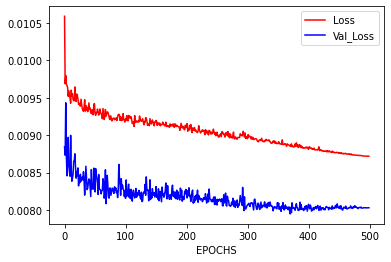

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00014: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00017: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 00020: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 00023: ReduceLROnPlateau reducing learning rate to 1e-05.

Loss 0.008718492463231087

VAL Loss 0.008048860356211662


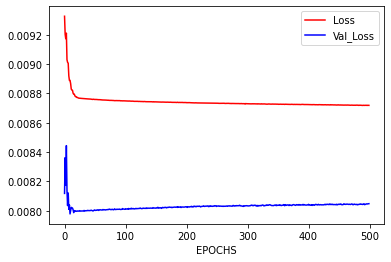


Loss 0.008825784549117088

VAL Loss 0.008007577620446682


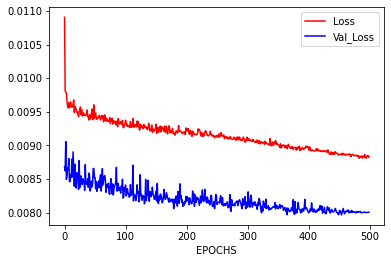

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00013: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00016: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00019: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 00022: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 00025: ReduceLROnPlateau reducing learning rate to 1e-05.

Loss 0.00882253423333168

VAL Loss 0.00802801176905632


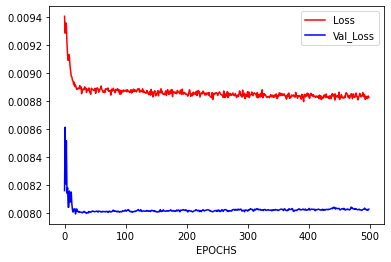


Loss 0.008694596588611603

VAL Loss 0.008182840421795845


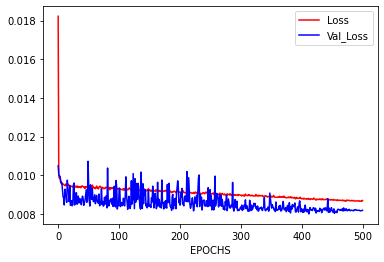

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Epoch 00012: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00019: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00022: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00025: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00028: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 00031: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 00034: ReduceLROnPlateau reducing learning rate to 1e-05.

Loss 0.008672712370753288

VAL Loss 0.008197144605219364


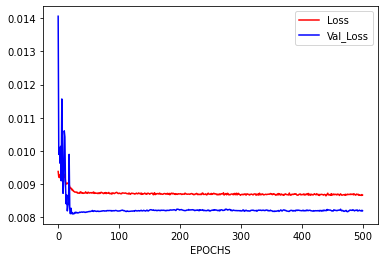


Loss 0.00877300649881363

VAL Loss 0.008245446719229221


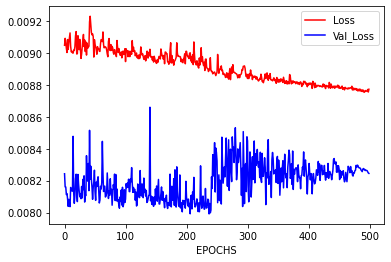

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00014: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00017: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 00020: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 00023: ReduceLROnPlateau reducing learning rate to 1e-05.

Loss 0.008754369802772999

VAL Loss 0.008210987783968449


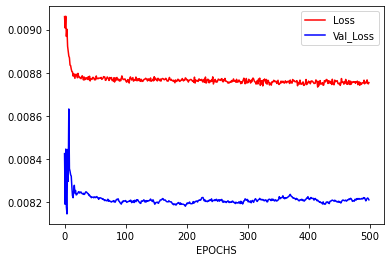


Loss 0.008889599703252316

VAL Loss 0.008012983947992325


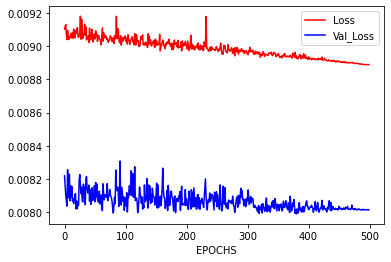

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00014: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00017: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 00020: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 00023: ReduceLROnPlateau reducing learning rate to 1e-05.

Loss 0.00888928771018982

VAL Loss 0.008008367381989956


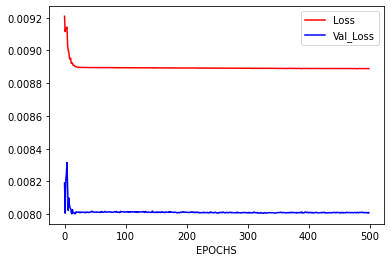

In [30]:
i = 1
for model in [model1,model2,model3,model4,model5]:
    print('='*60)
    OPT1(i,model,32,500) #batch 32, epochs 500
    print('----'*60)
    OPT2(i,model,32,500)
    i+=1


Loss 0.00858837366104126

VAL Loss 0.008145314641296864


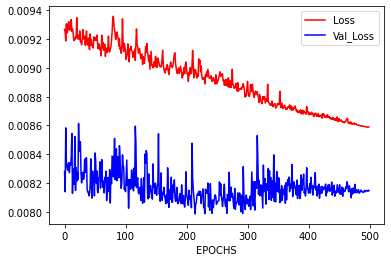

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00013: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00016: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 00019: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 00022: ReduceLROnPlateau reducing learning rate to 1e-05.

Loss 0.008578160777688026

VAL Loss 0.008110670372843742


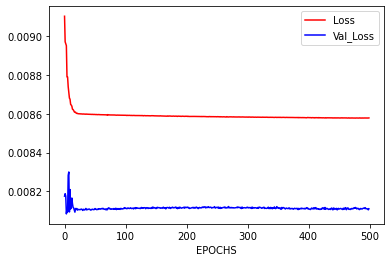


Loss 0.008704900741577148

VAL Loss 0.007970773614943027


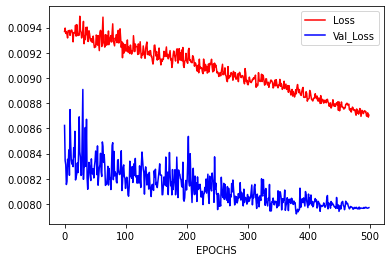

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00015: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00018: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 00021: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 00024: ReduceLROnPlateau reducing learning rate to 1e-05.

Loss 0.008700782433152199

VAL Loss 0.007978005334734917


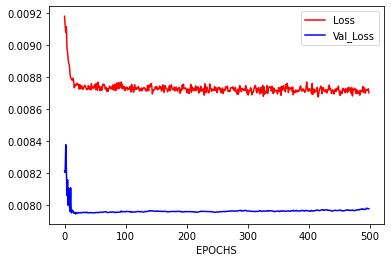


Loss 0.008886346593499184

VAL Loss 0.00813223421573639


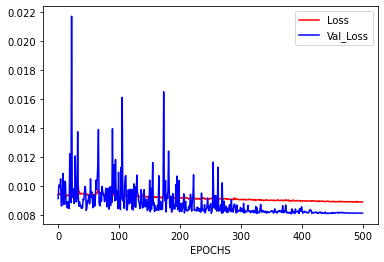

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00012: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00016: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00019: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00022: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 00025: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 00028: ReduceLROnPlateau reducing learning rate to 1e-05.

Loss 0.00886329635977745

VAL Loss 0.008134952746331692


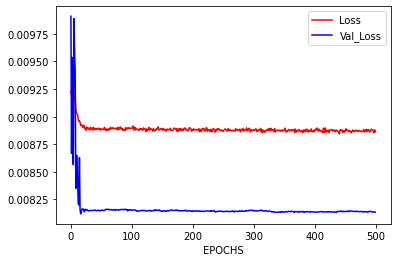


Loss 0.008783143013715744

VAL Loss 0.008346771821379662


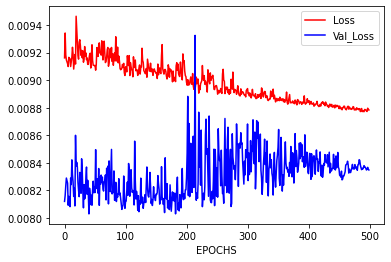

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00013: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00016: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 00019: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 00022: ReduceLROnPlateau reducing learning rate to 1e-05.

Loss 0.008769801817834377

VAL Loss 0.008171526715159416


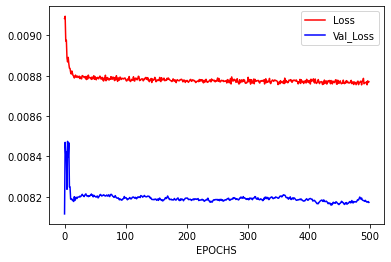


Loss 0.008865580894052982

VAL Loss 0.008031190373003483


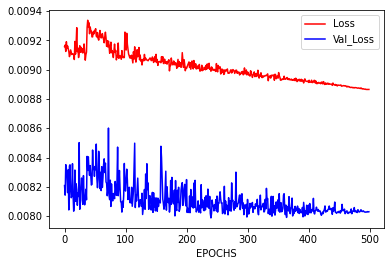

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00013: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00016: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00019: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 00022: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 00025: ReduceLROnPlateau reducing learning rate to 1e-05.

Loss 0.008862605318427086

VAL Loss 0.00803636945784092


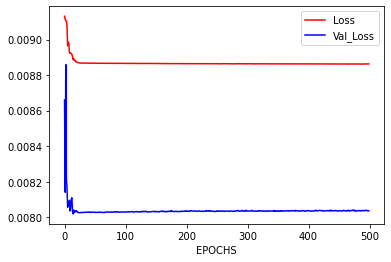

In [31]:
i = 1
for model in [model1,model2,model3,model4,model5]:
    print('='*60)
    OPT1(i,model,16,500) #batch 16, epochs 500
    print('----'*60)
    OPT2(i,model,16,500)
    i +=1


Loss 0.0085383839905262

VAL Loss 0.008228645659983158


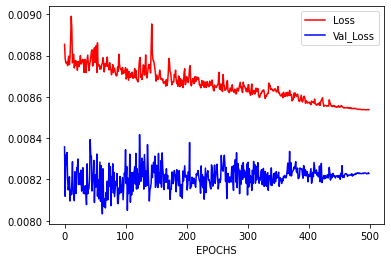

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00013: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00016: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00019: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 00022: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 00025: ReduceLROnPlateau reducing learning rate to 1e-05.

Loss 0.008540314622223377

VAL Loss 0.008230426348745823


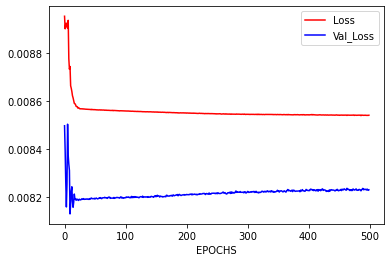


Loss 0.008628619834780693

VAL Loss 0.008139420300722122


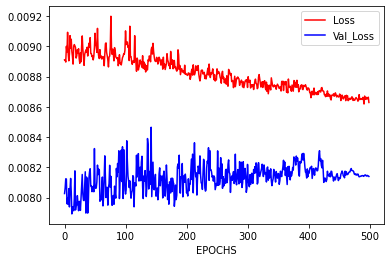

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00014: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00017: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 00020: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 00023: ReduceLROnPlateau reducing learning rate to 1e-05.

Loss 0.008630329743027687

VAL Loss 0.00818256288766861


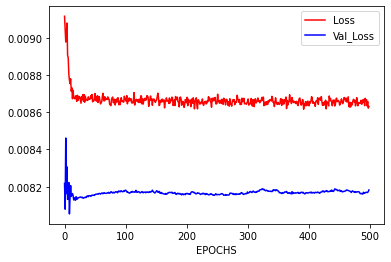


Loss 0.008783175610005856

VAL Loss 0.00811080913990736


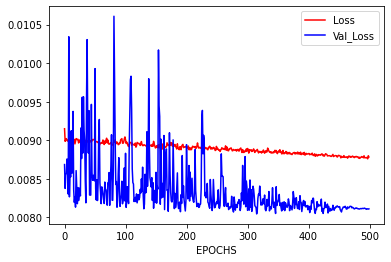

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00015: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00018: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00021: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00026: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 00029: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 00032: ReduceLROnPlateau reducing learning rate to 1e-05.

Loss 0.008820348419249058

VAL Loss 0.008086977526545525


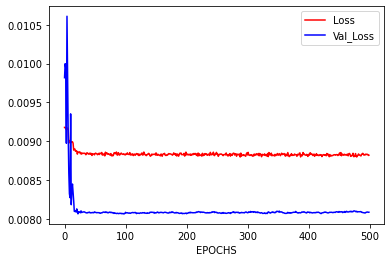


Loss 0.008720631711184978

VAL Loss 0.008232556283473969


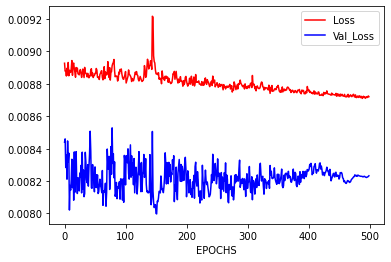

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00012: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00015: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00018: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 00021: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 00024: ReduceLROnPlateau reducing learning rate to 1e-05.

Loss 0.008737698197364807

VAL Loss 0.00819802563637495


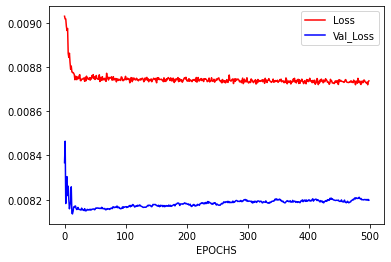


Loss 0.008840748108923435

VAL Loss 0.008032518438994884


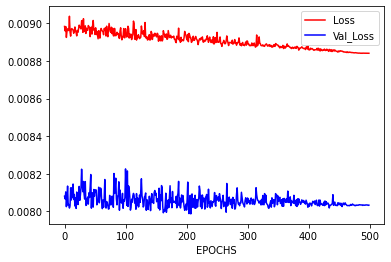

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00013: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00016: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 00019: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 00022: ReduceLROnPlateau reducing learning rate to 1e-05.

Loss 0.008841169066727161

VAL Loss 0.008021711371839046


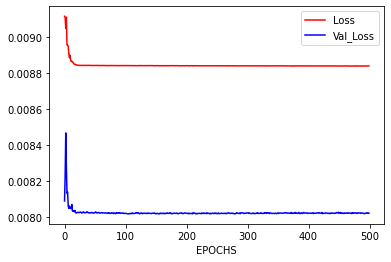

In [32]:
i = 1
for model in [model1,model2,model3,model4,model5]:
    print('='*60)
    OPT1(i,model,64,500) #batch 64, epochs 500
    print('----'*60)
    OPT2(i,model,64,500)
    i +=1